# Analysis of Calcium Imaging Data in SMA During Spontaneous Condition

**Note: This notebook was AI-generated using dandi-notebook-gen and has not been fully verified. Please be cautious when interpreting the code or results.**

This notebook explores calcium imaging data from the supplementary motor area (SMA) of a macaque during spontaneous behavior. The dataset is part of a larger study examining motor cortices in non-human primates using calcium imaging and miniature microscopes.

## Dataset Overview

* **Dataset Name**: Calcium imaging in SMA and M1 of macaques
* **Subject**: Q (Macaca mulatta, female, 5 years old)
* **Brain Region**: Supplementary Motor Area (SMA)
* **Recording Type**: One-photon calcium imaging with GCaMP6f
* **Condition**: Spontaneous activity
* **Sampling Rate**: 10.01 Hz

## Required Packages

To run this notebook, you'll need the following Python packages:
- pynwb
- lindi
- numpy
- matplotlib
- seaborn

In [1]:
import pynwb
import lindi
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set the visual style
sns.set_theme()

## Loading the Dataset

First, let's load the NWB file and examine its contents. We'll use the DANDI API to get the list of available assets.

In [2]:
from dandi.dandiapi import DandiAPIClient

# List all assets in the Dandiset
client = DandiAPIClient()
dandiset = client.get_dandiset("001174")
assets = list(dandiset.get_assets())
print(f"Total number of assets: {len(assets)}")

# Load a specific NWB file
# We'll use a recording from subject Q during spontaneous condition
f = lindi.LindiH5pyFile.from_lindi_file("https://lindi.neurosift.org/dandi/dandisets/001174/assets/9c3678d5-22c3-402c-8cd4-6bc38c4d61e3/nwb.lindi.json")
nwb = pynwb.NWBHDF5IO(file=f, mode='r').read()

# Display basic session information
print(f"\nSession Information:")
print(f"Description: {nwb.session_description}")
print(f"Subject ID: {nwb.subject.subject_id}")
print(f"Subject Species: {nwb.subject.species}")
print(f"Subject Sex: {nwb.subject.sex}")
print(f"Subject Age: {nwb.subject.age}")
print(f"Recording Date: {nwb.session_start_time}")

Total number of assets: 45



Session Information:
Description: Calcium imaging in SMA during the spontaneous condition
Subject ID: Q
Subject Species: Macaca mulatta
Subject Sex: F
Subject Age: P5Y
Recording Date: 2022-10-03 13:19:52.708000+00:00


## Spatial Organization of Cells

Let's visualize the spatial distribution of the recorded cells using their image masks.

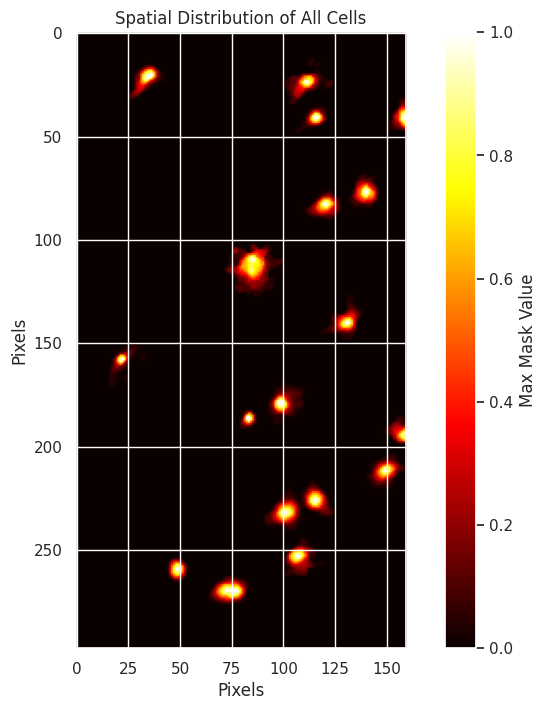


Number of cells: 18
Field of view dimensions: 298x160 pixels


In [3]:
# Get the image masks
plane_seg = nwb.processing['ophys']['ImageSegmentation']['PlaneSegmentation']
image_masks = plane_seg['image_mask'].data[:]

# Create superimposed image of all masks
all_masks = np.max(image_masks, axis=0)

# Plot the spatial distribution
plt.figure(figsize=(10, 8))
plt.imshow(all_masks, cmap='hot')
plt.colorbar(label='Max Mask Value')
plt.title('Spatial Distribution of All Cells')
plt.xlabel('Pixels')
plt.ylabel('Pixels')
plt.show()

# Print some statistics about the cell masks
print(f"\nNumber of cells: {image_masks.shape[0]}")
print(f"Field of view dimensions: {image_masks.shape[1]}x{image_masks.shape[2]} pixels")

The image above shows the spatial distribution of all identified cells in the field of view. Each bright spot represents a cell, with the intensity indicating the strength of the cell mask. The cells appear to be distributed across the field of view with some clustering visible in certain regions.

## Neural Activity Analysis

Now let's analyze the temporal dynamics of neural activity. We'll look at both the raw fluorescence signals and detected neural events.

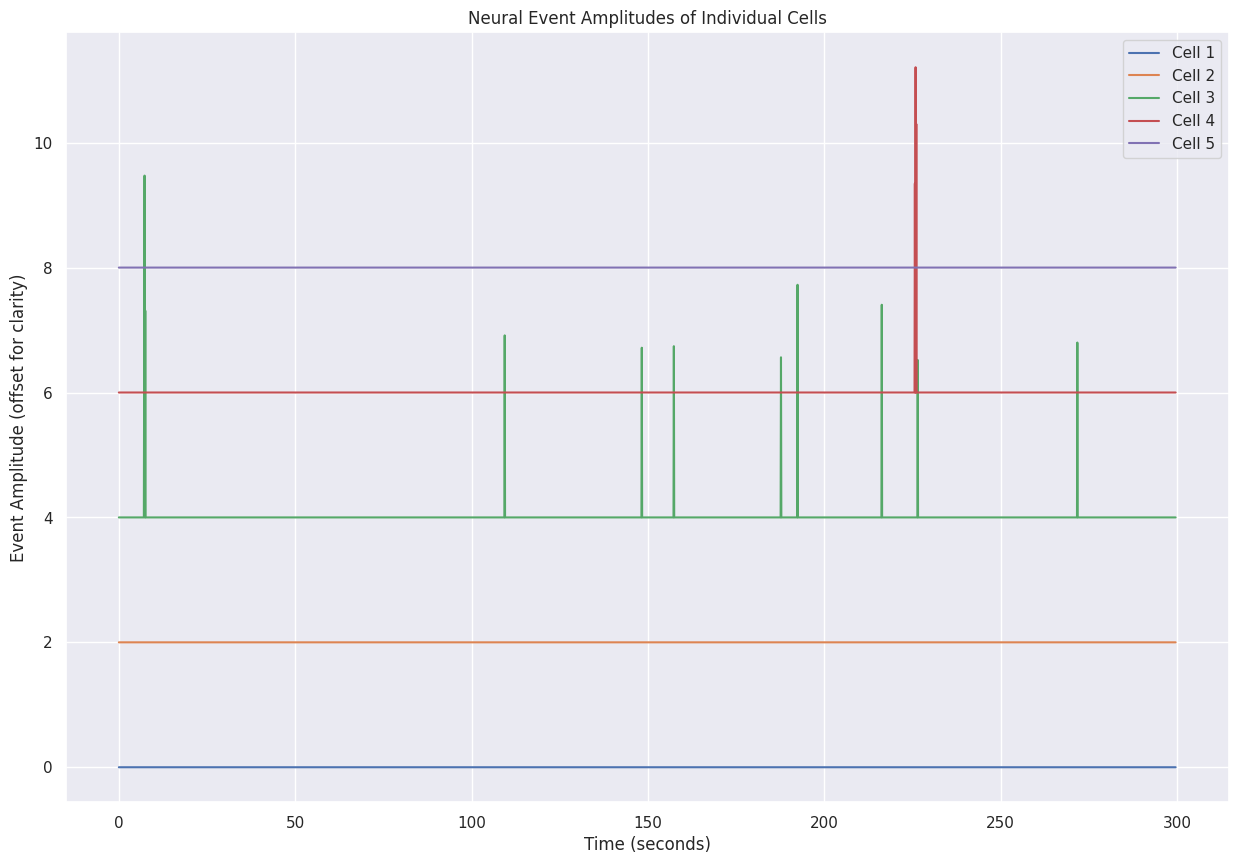

In [4]:
# Get the event data
events = nwb.processing['ophys']['EventAmplitude']
event_data = events.data[:]
sampling_rate = events.rate

# Create time vector
time = np.arange(event_data.shape[0]) / sampling_rate

# Plot event traces for first 5 cells
plt.figure(figsize=(15, 10))
for i in range(5):
    plt.plot(time[:3000], event_data[:3000, i] + i*2, label=f'Cell {i+1}')

plt.xlabel('Time (seconds)')
plt.ylabel('Event Amplitude (offset for clarity)')
plt.title('Neural Event Amplitudes of Individual Cells')
plt.legend()
plt.grid(True)
plt.show()

The traces above show the detected neural events for the first 5 cells over a 300-second period. Each vertical line represents a detected calcium event, with the height indicating the event amplitude. We can observe that:

* Different cells show varying levels of activity
* Events occur sporadically rather than rhythmically
* Some cells show clusters of events while others have more isolated events
* Event amplitudes vary considerably between cells and events

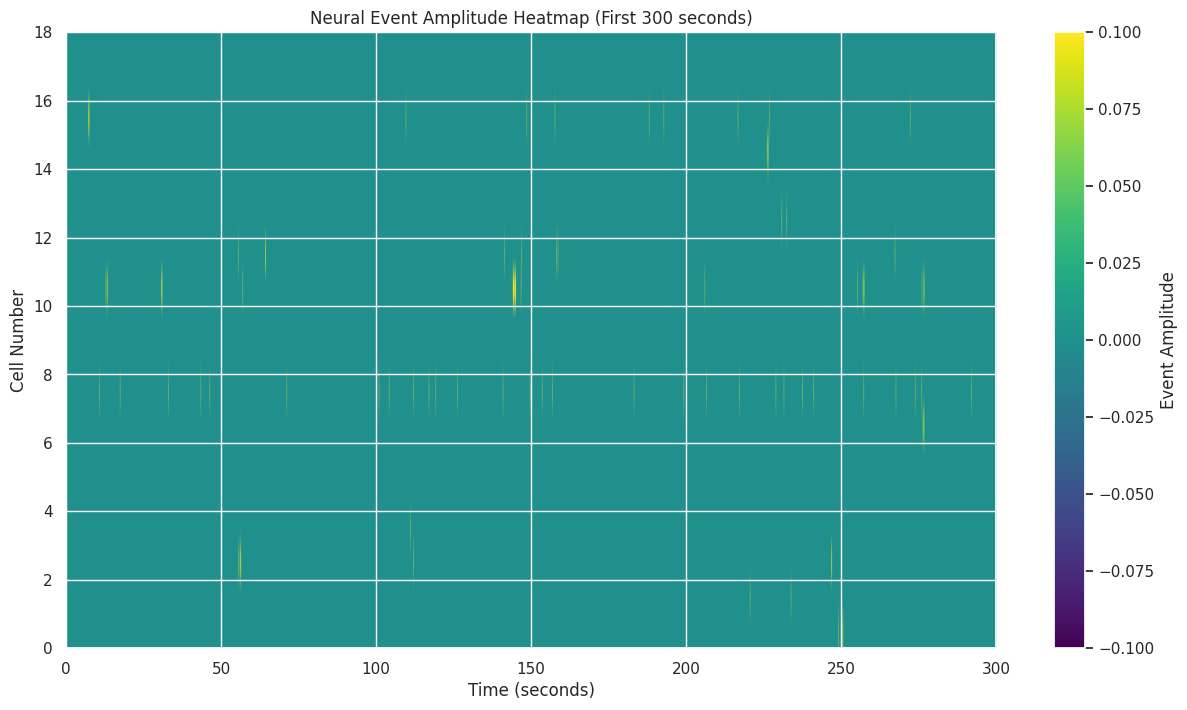


Event Statistics:
Recording duration: 1309.61 seconds
Sampling rate: 10.01 Hz
Mean event amplitude: 0.0093
Max event amplitude: 9.8967


In [5]:
# Create event amplitude heatmap
plt.figure(figsize=(15, 8))
time_slice = 3000  # 300 seconds * 10 Hz
plt.imshow(event_data[:time_slice, :].T, aspect='auto', cmap='viridis',
           extent=[0, 300, 0, event_data.shape[1]], vmin=0, vmax=np.percentile(event_data, 99))
plt.colorbar(label='Event Amplitude')
plt.xlabel('Time (seconds)')
plt.ylabel('Cell Number')
plt.title('Neural Event Amplitude Heatmap (First 300 seconds)')
plt.show()

# Print some statistics about the events
print(f"\nEvent Statistics:")
print(f"Recording duration: {event_data.shape[0]/sampling_rate:.2f} seconds")
print(f"Sampling rate: {sampling_rate:.2f} Hz")
print(f"Mean event amplitude: {np.mean(np.mean(event_data, axis=0)):.4f}")
print(f"Max event amplitude: {np.max(event_data):.4f}")

The heatmap provides a comprehensive view of all cells' activity over time. Each row represents a cell, and the color intensity indicates the amplitude of detected events. This visualization reveals:

* Sparse activation patterns across the population
* Cell-specific differences in event frequency and amplitude
* Limited synchronous activation across multiple cells
* Temporal heterogeneity in neural activity

## Conclusions

This analysis reveals several key features of neural activity in the macaque SMA during spontaneous behavior:

1. **Spatial Organization**: The cells are distributed across the field of view with some local clustering.

2. **Temporal Dynamics**: 
   - Neural events are sparse and irregular
   - Different cells show distinct activity patterns
   - Limited synchronization between cells

3. **Event Characteristics**:
   - Event amplitudes vary considerably (up to ~9.9 units)
   - Mean event amplitude is relatively low (0.0093), indicating sparse activity
   - Events tend to be brief and well-separated in time

These observations provide insights into the baseline activity patterns of SMA neurons during spontaneous behavior, which can be valuable for comparing with task-related activity or understanding motor cortex function.

## Next Steps

Researchers might consider:
1. Comparing this spontaneous activity with task-related recordings
2. Analyzing cell-cell correlations in more detail
3. Investigating the relationship between spatial organization and functional properties
4. Examining longer time windows for slower patterns of activity